## Explorando bases de activaciones TC

Código para explorar la información de activaciones de TC tradicional

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas_profiling
import os
from datetime import datetime, timedelta
import dateutil.relativedelta
import gc

pd.set_option('display.max_columns',None)

In [4]:
path_file='s3://adl-refined-dev-popular/data_orig/productos/activo-tarjeta-credito-nueva/productos_activos-tarjeta-credito-activadas_masterfile_H20180101-20200327.csv'

data_orig = pd.read_csv(path_file, sep = '|', encoding='ISO8859-1',quoting=1, dtype={'ID_CLIENTE':str})


In [5]:
data = data_orig.drop_duplicates()

print(data_orig.shape)
print(data.shape)

(40422, 6)
(40411, 6)


In [6]:
# Casting variables
data['fecha_activacion'] = pd.to_datetime(data['fecha_activacion'],format='%d/%m/%Y')
data['mes_activacion'] = pd.to_datetime(data['fecha_activacion'].dt.strftime('%Y-%m'),format='%Y-%m')

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
print(data.shape)
data.head()

(40411, 7)


,Numero_cuenta,Numero_tarjeta,Identificacion,Tipo_identificacion,fecha_activacion,ID_CLIENTE,mes_activacion
0,5392386030737574936,539238******7338,72376,2,2018-01-29,489152311997977401,2018-01-01
1,4205594037122388692,420559******1701,72376,2,2018-01-29,489152311997977401,2018-01-01
2,5391686024870915922,539168******9961,131658,2,2019-10-29,851557066763798702,2019-10-01
3,4544054304149486544,454405******9846,131658,2,2019-10-29,851557066763798702,2019-10-01
4,4205594035742557191,420559******1788,132796,2,2019-09-27,139052309749044702,2019-09-01


In [10]:
# Volumenes mensuales:
data.groupby('mes_activacion').size()

mes_activacion
2018-01-01     777
2018-02-01     984
2018-03-01     870
2018-04-01    1133
2018-05-01    1242
2018-06-01    1181
2018-07-01    1169
2018-08-01    1228
2018-09-01    1335
2018-10-01    1317
2018-11-01    1175
2018-12-01    1192
2019-01-01    1273
2019-02-01    1538
2019-03-01    1659
2019-04-01    1747
2019-05-01    1813
2019-06-01    1556
2019-07-01    1830
2019-08-01    1641
2019-09-01    2014
2019-10-01    2061
2019-11-01    1294
2019-12-01    1960
2020-01-01    1743
2020-02-01    2565
2020-03-01    2114
dtype: int64

Text(0, 0.5, 'Mes de activación')

/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


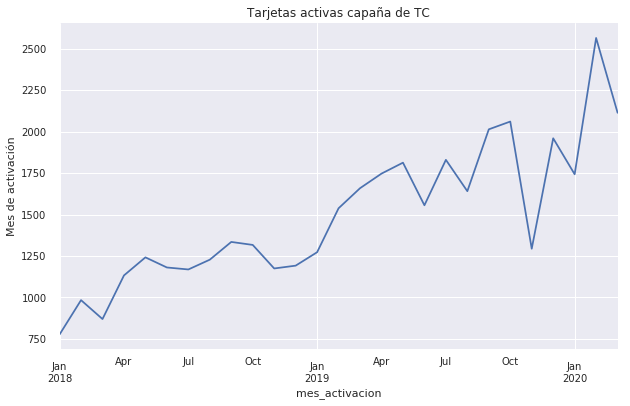

In [11]:
plt.figure(figsize=(10, 6))
data.groupby('mes_activacion').size().plot()
plt.title('Tarjetas activas capaña de TC')
plt.ylabel('Número de tarjetas activadas')
plt.ylabel('Mes de activación')